In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [48]:

house_df = pd.read_csv("../Program_01/housing.csv")
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [49]:
house_df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.000633,0.0,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.0,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.0,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.0,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.0,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.0,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.0,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.0,0.151967,0.638489,0.688788,0.123165,3.135494
505,0.000462,0.0,0.420455,0.0,0.327021,0.387355,0.589045,0.117847,0.0,0.151967,0.638489,0.693147,0.156749,2.557227


In [50]:
print("Dataset shape :",house_df.shape)

Dataset shape : (506, 14)


In [51]:
#check there are any NAN values
house_df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(506, 14))

In [52]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.036362,0.077805,0.000000,0.000851,0.002808,0.040430,0.693147
ZN,506.0,0.090296,0.175973,0.000000,0.000000,0.000000,0.117783,0.693147
INDUS,506.0,0.391378,0.251479,0.000000,0.173387,0.338343,0.646628,1.000000
CHAS,506.0,0.047945,0.176055,0.000000,0.000000,0.000000,0.000000,0.693147
NOX,506.0,0.284651,0.170604,0.000000,0.123710,0.273696,0.399963,0.693147
RM,506.0,0.416052,0.088357,0.000000,0.368380,0.410307,0.461718,0.693147
AGE,506.0,0.500107,0.186799,0.000000,0.360350,0.570007,0.662162,0.693147
DIS,506.0,0.206017,0.146027,0.000000,0.084579,0.173069,0.314141,0.693147
RAD,506.0,0.282694,0.249808,0.000000,0.122602,0.160343,0.693147,0.693147
TAX,506.0,0.328215,0.215915,0.000000,0.161755,0.241298,0.649259,0.693147


In [53]:
X = house_df.drop("MEDV", axis=1) #Separate Features (X) and Target (y)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165


In [54]:
y = house_df["MEDV"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(404, 13)

In [57]:
X_test.shape

(102, 13)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [59]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)   # Linear output for regression
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae", keras.metrics.RootMeanSquaredError(name="rmse")]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Trained the model 
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=2
)

Epoch 1/150
11/11 - 2s - 199ms/step - loss: 9.6842 - mae: 3.0898 - rmse: 3.1119 - val_loss: 7.6115 - val_mae: 2.7387 - val_rmse: 2.7589
Epoch 2/150
11/11 - 0s - 17ms/step - loss: 6.6577 - mae: 2.5466 - rmse: 2.5803 - val_loss: 5.2861 - val_mae: 2.2708 - val_rmse: 2.2992
Epoch 3/150
11/11 - 0s - 11ms/step - loss: 4.2873 - mae: 2.0114 - rmse: 2.0706 - val_loss: 2.9815 - val_mae: 1.6766 - val_rmse: 1.7267
Epoch 4/150
11/11 - 0s - 12ms/step - loss: 2.0839 - mae: 1.3243 - rmse: 1.4436 - val_loss: 1.1100 - val_mae: 0.9372 - val_rmse: 1.0536
Epoch 5/150
11/11 - 0s - 12ms/step - loss: 0.8461 - mae: 0.7524 - rmse: 0.9199 - val_loss: 0.4222 - val_mae: 0.5277 - val_rmse: 0.6498
Epoch 6/150
11/11 - 0s - 13ms/step - loss: 0.6304 - mae: 0.6409 - rmse: 0.7940 - val_loss: 0.3353 - val_mae: 0.4699 - val_rmse: 0.5790
Epoch 7/150
11/11 - 0s - 14ms/step - loss: 0.4802 - mae: 0.5545 - rmse: 0.6929 - val_loss: 0.3106 - val_mae: 0.4677 - val_rmse: 0.5574
Epoch 8/150
11/11 - 0s - 11ms/step - loss: 0.3767 - ma

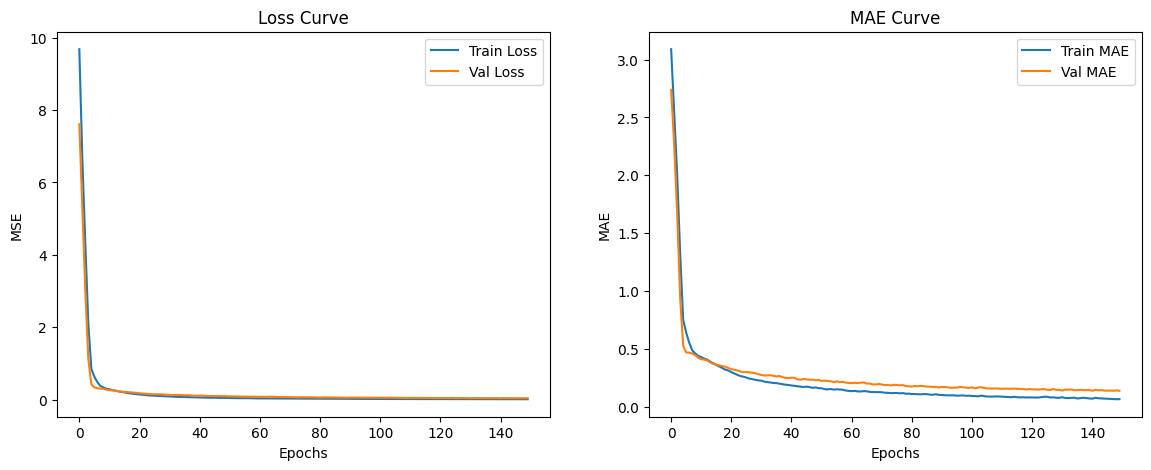

In [61]:
plt.figure(figsize=(14,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Loss Curve")
plt.legend()

# MAE plot
plt.subplot(1,2,2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE Curve")
plt.legend()

plt.show()


In [63]:
# Evaluate on Test Set
test_results = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Test Set Results:")
print(f"Loss (MSE): {test_results[0]:.4f}")
print(f"MAE: {test_results[1]:.4f}")
print(f"RMSE: {test_results[2]:.4f}")


Test Set Results:
Loss (MSE): 0.0299
MAE: 0.1262
RMSE: 0.1730


In [64]:
y_pred = model.predict(X_test_scaled).flatten()

comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison_df.head(10)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Actual,Predicted
0,3.202746,3.435426
1,3.508556,3.542991
2,2.681022,3.000358
3,3.169686,3.312065
4,2.839078,2.838608
5,3.044522,3.051366
6,2.933857,2.982738
7,2.708050,2.876338
8,3.025291,3.060105
9,2.879198,2.938594


In [ ]:
# Importing Deep Learning Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import boston_housing

# Model Loading
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()
print(x_test.dtype)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

x_test.describe()

# Preprocessing
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_test)

# Model Building
ann = Sequential()
ann.add(Dense(units= 13,activation = 'relu'))
ann.add(Dense(units= 64,activation = 'relu'))
ann.add(Dense(units=1))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

ann.summary()

# Model Training
ann.compile(optimizer=opt,loss = 'mse',metrics=['mae'])


hist=ann.fit(x_train,y_train,batch_size = 32,epochs = 20,validation_data=(x_test,y_test),verbose = 1)

fig,row = plt.subplots(1,2 ,figsize=(10,4))
plt.plot(hist.epoch,hist.history['mae'],label = 'Train')
plt.plot(hist.epoch,hist.history['val_mae'],label = 'Test')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Vs Epochs')

row[0].plot(hist.epoch,hist.history['loss'],label = 'Train')
row[0].plot(hist.epoch,hist.history['val_loss'],label = 'Test')
row[0].legend()
row[0].grid()
row[0].set_xlabel('Epochs')
row[0].set_ylabel('Loss')
row[0].set_title("Loss Vs Epochs")
